In [1]:
 !pip uninstall opencv-python

Found existing installation: opencv-python 4.1.2.30
Uninstalling opencv-python-4.1.2.30:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/cv2/*
    /usr/local/lib/python3.7/dist-packages/opencv_python-4.1.2.30.dist-info/*
Proceed (y/n)? y
  Successfully uninstalled opencv-python-4.1.2.30


In [2]:
!pip install opencv-contrib-python==3.4.2.17

     |████████████████████████████████| 30.6 MB 48.3 MB/s 
  Attempting uninstall: opencv-contrib-python
    Found existing installation: opencv-contrib-python 4.1.2.30
    Uninstalling opencv-contrib-python-4.1.2.30:
      Successfully uninstalled opencv-contrib-python-4.1.2.30


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Q 1.1

- Discuss the effect of the parameters 
1. $\sigma_x$: The number of corners found can be decreased as σ increases due to increased smoothing(bigger σ means that neighbor pixels would give more effects on blurring)
2. $\sigma_\sigma'$: corner dection can be harder as the kernel size increase. for example, too big kernel size is not enough sensitive to capture the change of intensitiy in the small region.
3. k: from $R = det(H) - k[trace(H)^2]$, bigger k cause the smaller R. for corner point, R has larger number. if k is too large to compute R, harris corner detector can fail to detect enough corner points. 


In [4]:
import numpy as np
import cv2
import scipy
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
from scipy.spatial import distance_matrix

# Q 1.2 Harris Corner detection

1. Color to grayscale
2. Gaussian blur
3. compute image derivative dx, dy 
4. Harris response calculation, R
5. Visualization heatmap and key point

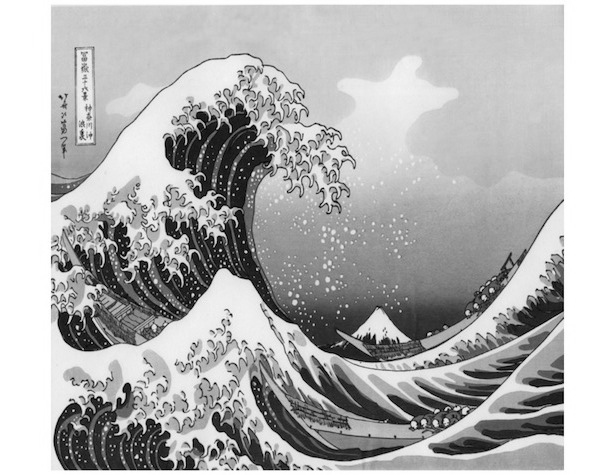

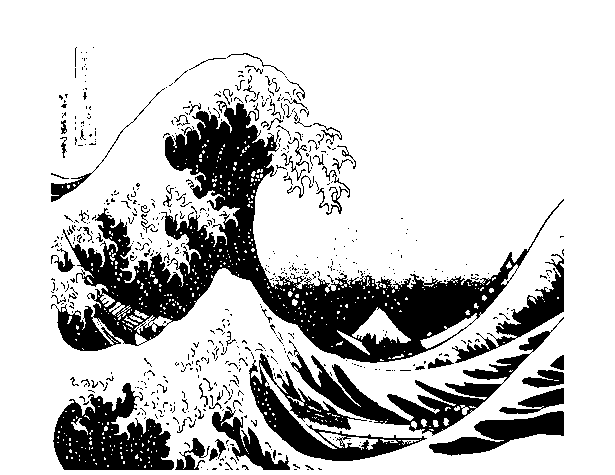

In [5]:
# read image 
img_dir = '/content/drive/MyDrive/Colab Notebooks/CSCE5703/HW2/Code/objets/objet1.jpg'
img = cv2.imread(img_dir)

h, w = img.shape[0], img.shape[1]

# color to gray
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray)
#normalize
gray = cv2.normalize(gray, None, 0, 1, cv2.NORM_MINMAX)

cv2_imshow(gray*255)

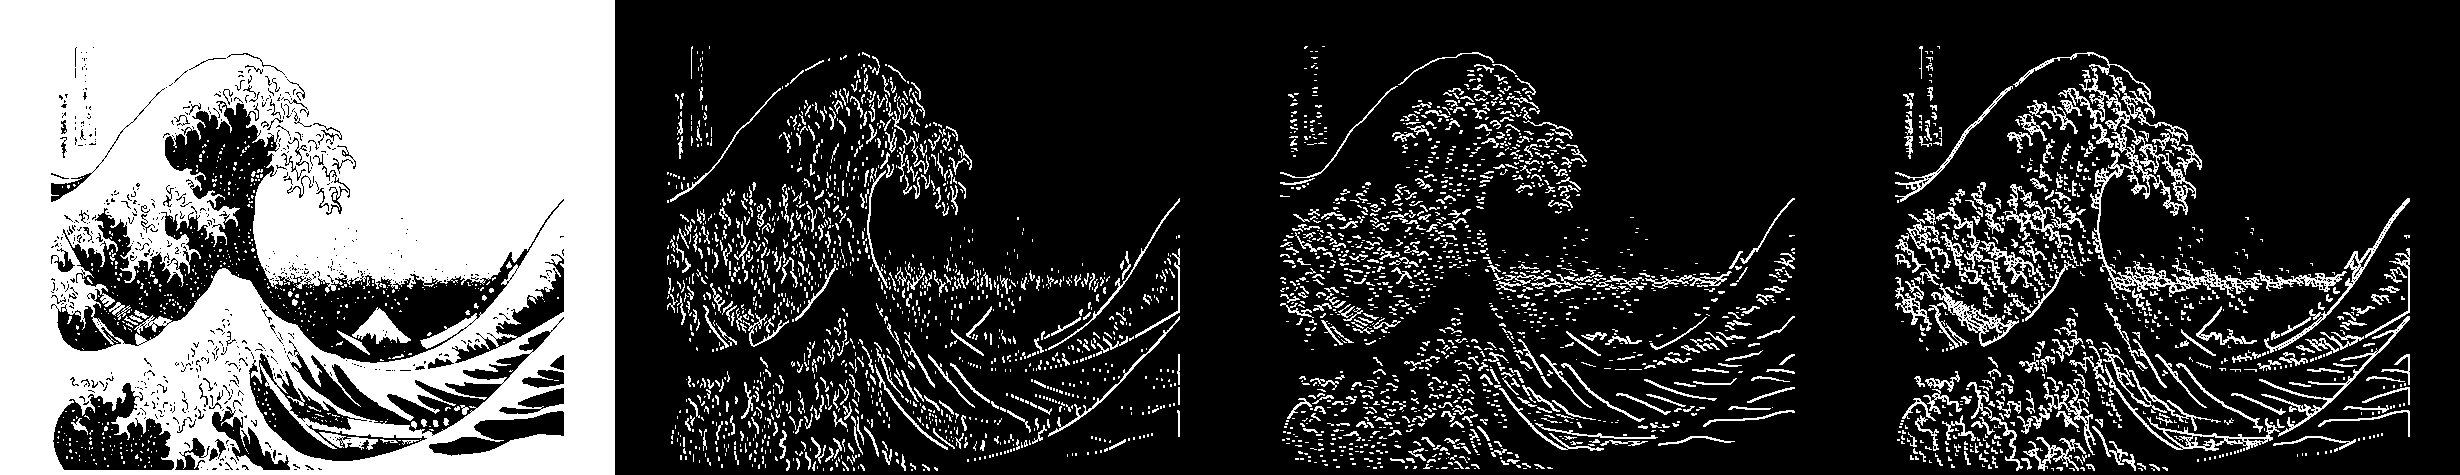

In [6]:
# image derivatives dx, dy
# create sobel kernel
sobel_x = np.array([[-1,0,1], [-2,0,2], [-1,0,1]])
sobel_y = np.array([[1,2,1], [0,0,0], [-1,-2,-1]])
dx = cv2.filter2D(gray, -1, sobel_x)
dy = cv2.filter2D(gray, -1, sobel_y)

merged = np.hstack((gray*255, dx*255, dy*255, 255*(dx+dy)))
cv2_imshow(merged)

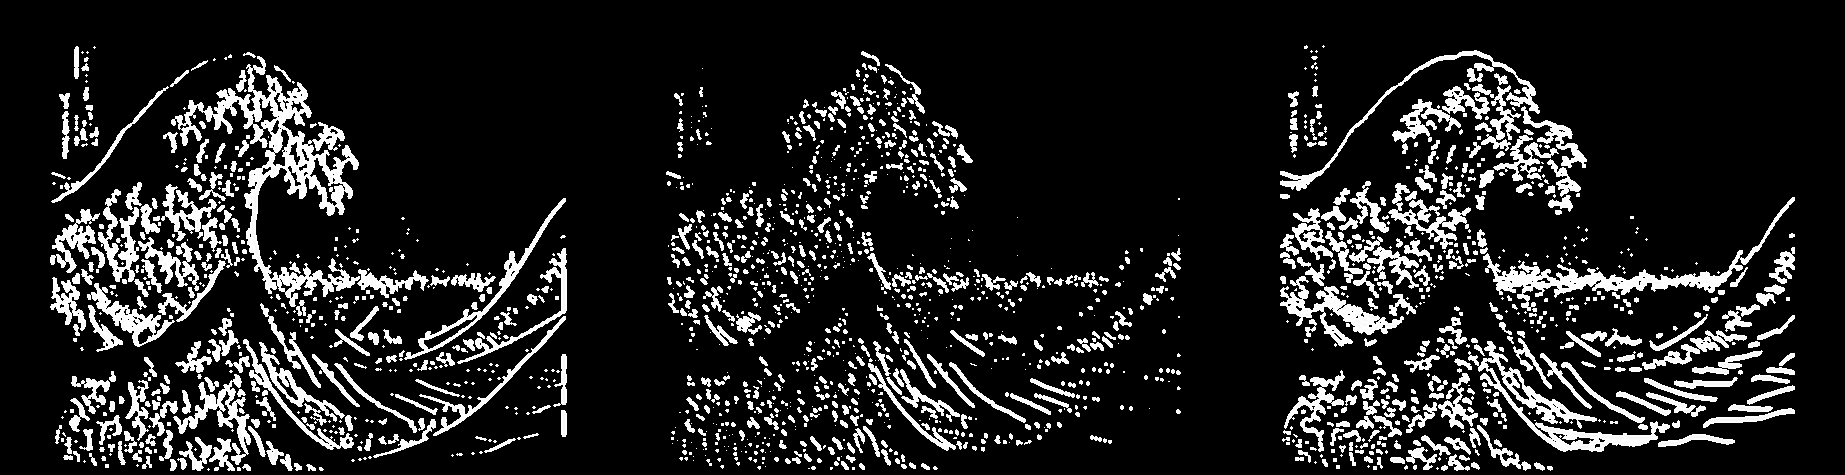

In [7]:
dx2 = np.square(dx)
dxy = dx*dy
dy2 = np.square(dy)

# Gaussian Blur 
'''
# create kernel
gaussian_k = np.array([[1,2,1], 
              [2,4,2],
              [1,2,1]])*(1/16)
dx2 = cv2.filter2D(dx2, -1, gaussian_k)
dxy = cv2.filter2D(dxy, -1, gaussian_k)
dy2 = cv2.filter2D(dy2, -1, gaussian_k)
'''
kernel_size = 5 # 3,5,7
gaussian_k = cv2.getGaussianKernel(kernel_size,1)
dx2 = cv2.filter2D(dx2, -1, gaussian_k*gaussian_k.T)
dy2 = cv2.filter2D(dy2, -1, gaussian_k*gaussian_k.T)
dxy = cv2.filter2D(dxy, -1, gaussian_k*gaussian_k.T)

merged = np.hstack((255*dx2, 255*dxy, 255*dy2))

cv2_imshow(merged)

In [8]:
# calculate Harris matrix
k =  0.05
detA = dx2*dy2 - dxy**2
trace = dx2 + dy2

H = detA - k*(trace**2)
print(H.shape)

(475, 615)


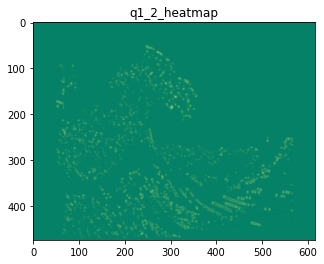

In [9]:
heatmap = plt.imshow(255*H , cmap = 'summer', interpolation = 'bicubic' )
plt.title( "q1_2_heatmap" )
plt.savefig('/content/drive/MyDrive/Colab Notebooks/CSCE5703/HW2/Code/q1_2_heatmap.jpg')
plt.show()

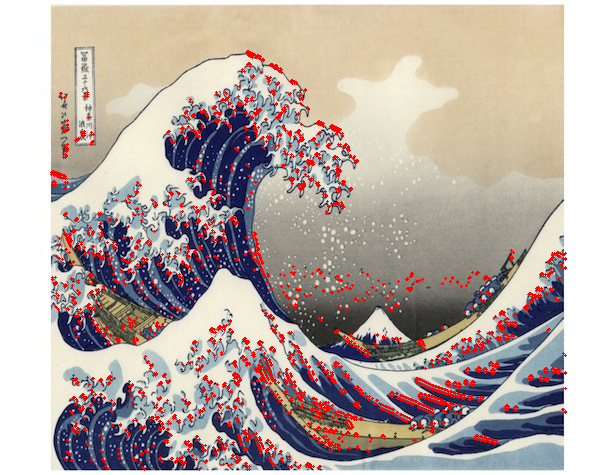

True

In [10]:
corner_img = np.copy(img)
edge_img = np.copy(img)

threshold = 200
green = (0, 255, 0)
red = (0,0,255)
radius = 1

corners = []

for row_idx, row in enumerate(H):
  for col_idx, point in enumerate(row):
    if point > threshold: # corner
      corners.append((row_idx, col_idx))
      corner_img = cv2.circle(corner_img, (col_idx, row_idx), radius, red, -1)
      #corner_img[row_idx, col_idx] = [0, 0, 255] # red

cv2_imshow(corner_img)
cv2.imwrite('/content/drive/MyDrive/Colab Notebooks/CSCE5703/HW2/Code/q1_2_corners.jpg',corner_img)

# reference

# harris corner detection

- https://muthu.co/harris-corner-detector-implementation-in-python/

- https://pyimagesearch.com/2021/05/12/image-gradients-with-opencv-sobel-and-scharr/

- https://evergreenllc2020.medium.com/fundamentals-of-image-gradients-and-edge-detection-b093662ade1b

- https://github.com/muthuspark/ml_research/blob/master/Process%20of%20Harris%20Corner%20Detection%20Algorithm.ipynb

- https://www.geekering.com/programming-languages/python/brunorsilva/harris-corner-detector-python/

- https://github.com/adityaintwala/Harris-Corner-Detection

- https://safwankdb.github.io/2020/03/14/harris-corner.html

- https://medium.com/@akumar5/computer-vision-gaussian-filter-from-scratch-b485837b6e09

- http://www.adeveloperdiary.com/data-science/computer-vision/applying-gaussian-smoothing-to-an-image-using-python-from-scratch/

# 2. Sift test from opencv 
- https://github.com/SamL98/PySIFT/blob/master/match.py


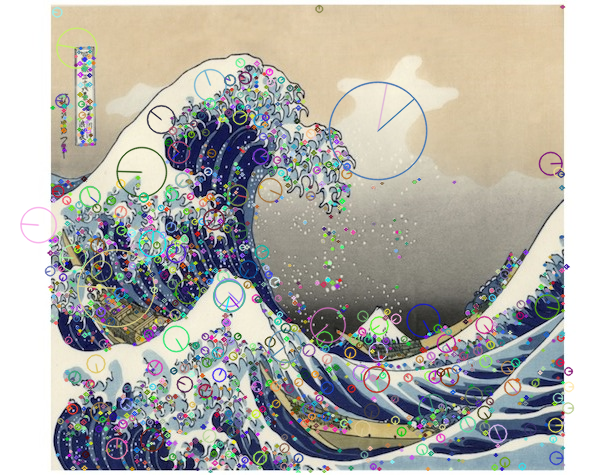

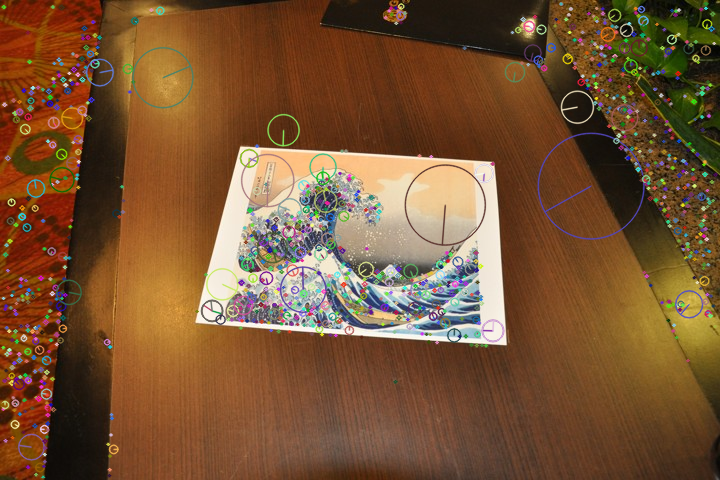

In [11]:
img_dir = '/content/drive/MyDrive/Colab Notebooks/CSCE5703/HW2/Code/objets/objet1.jpg'
img2_dir = '/content/drive/MyDrive/Colab Notebooks/CSCE5703/HW2/Code/images_test/0001.jpg'
img = cv2.imread(img_dir)
img2 = cv2.imread(img2_dir)
gray= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
# sift
sift = cv2.xfeatures2d.SIFT_create()
k1, des1 = sift.detectAndCompute(gray,None)
k2, des2 = sift.detectAndCompute(gray2,None)
#print('keypoints:', len(keypoints), 'descriptor:', descriptor.shape)
#print(descriptor)

# draw keypoints
img_draw = cv2.drawKeypoints(img, k1, None, flags = cv2.DrawMatchesFlags_DRAW_RICH_KEYPOINTS)
img_draw2 = cv2.drawKeypoints(img2, k2, None, flags = cv2.DrawMatchesFlags_DRAW_RICH_KEYPOINTS)

# show image
cv2_imshow(img_draw)
cv2_imshow(img_draw2)


#img=cv.drawKeypoints(gray,kp,img)
#cv.imwrite('sift_keypoints.jpg',img)

# Q3. Matching

In [12]:
def matchsift(D1, D2, alpha=0.8):

    matches = []
    dists = []

    for i in range(len(D1)):
        # Compute Pairwise Distance
        # distance = distance_matrix(D1, D2)
        distance = distance_matrix([D1[i]], D2)[0]
        # print(distance.shape)

        # Find the first and second closest D2 to D1[i] and its index
        idx1, idx2 = np.argsort(distance)[:2]
        d1, d2 = distance[idx1], distance[idx2]
        # Heuristic Checking
        if d1/d2 <= alpha:
            matches.append([i, idx1])
            dists.append(d1)

    return matches, dists



if __name__ == "__main__":

    # image path
    img_dir = '/content/drive/MyDrive/Colab Notebooks/CSCE5703/HW2/Code/objets/'
    img2_dir = '/content/drive/MyDrive/Colab Notebooks/CSCE5703/HW2/Code/images_test/'

    # object & test images
    test = {'objet1.jpg': ['0001.jpg', '0002.jpg'], 'objet2.jpg': ['0005.jpg', '0006.jpg'], 'objet3.jpg': ['0003.jpg', '0004.jpg']}

    for key, val in test.items():
      img1 = cv2.imread(img_dir + key)
      gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
      h, w = img1.shape[:2]
      for name in val: 
        img2 = cv2.imread(img2_dir + name)
        img2 = cv2.resize(img2, (w, h))
        gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

        sift = cv2.xfeatures2d.SIFT_create()
        kp1, D1 = sift.detectAndCompute(gray1,None)
        kp2, D2 = sift.detectAndCompute(gray2,None)
        print("Found %d keypoints in image 1" % len(D1))
        print("Found %d keypoints in image 2" % len(D2))
        matches, dists = matchsift(D1, D2, 0.7)
        image = np.concatenate([img1, img2], 1)

        for i, j in matches:
          x1, y1 = kp1[i].pt[:2]
          x2, y2 = kp2[j].pt[:2]
          x2 = x2 + w
          cv2.line(image, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 2)

        cv2.imwrite('/content/drive/MyDrive/Colab Notebooks/CSCE5703/HW2/Code/p3_2_match' + name, image)

Found 1953 keypoints in image 1
Found 1215 keypoints in image 2
Found 1953 keypoints in image 1
Found 1196 keypoints in image 2
Found 1013 keypoints in image 1
Found 853 keypoints in image 2
Found 1013 keypoints in image 1
Found 675 keypoints in image 2
Found 4469 keypoints in image 1
Found 1896 keypoints in image 2
Found 4469 keypoints in image 1
Found 972 keypoints in image 2


Found 1953 keypoints in image 1
Found 1215 keypoints in image 2


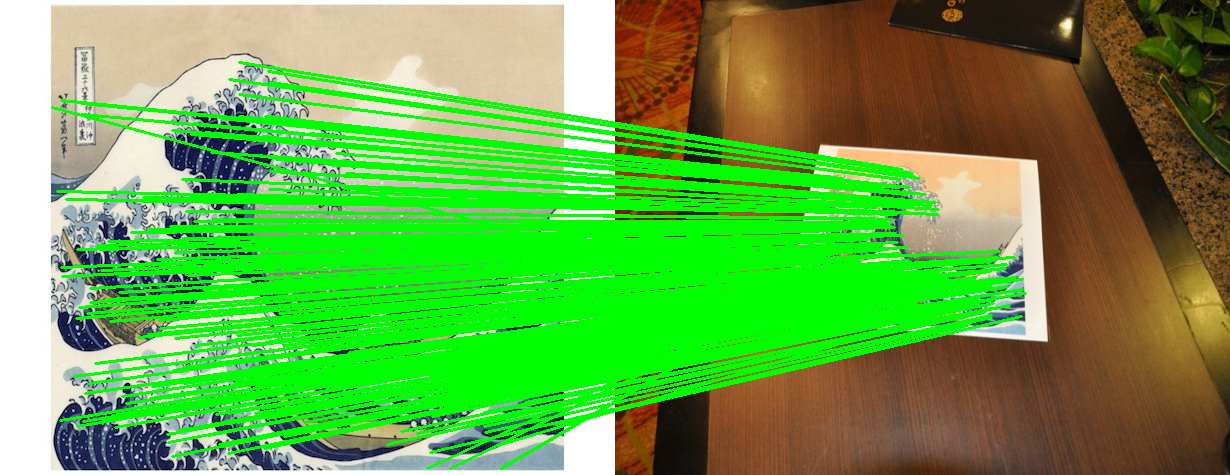

In [13]:
if __name__ == "__main__":

    # image path
    img_dir = '/content/drive/MyDrive/Colab Notebooks/CSCE5703/HW2/Code/objets/objet1.jpg'
    img2_dir = '/content/drive/MyDrive/Colab Notebooks/CSCE5703/HW2/Code/images_test/0001.jpg'

    # read images
    image1 = cv2.imread(img_dir)
    image2 = cv2.imread(img2_dir)

    image2 = cv2.resize(image2, (image1.shape[1], image1.shape[0]))

    gray1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
    gray2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

    sift = cv2.xfeatures2d.SIFT_create()
    kp1, D1 = sift.detectAndCompute(gray1,None)
    kp2, D2 = sift.detectAndCompute(gray2,None)

    print("Found %d keypoints in image 1" % len(D1))
    print("Found %d keypoints in image 2" % len(D2))


    matches, dists = matchsift(D1, D2, 0.7)
    image = np.concatenate([image1, image2], 1)
    for i, j in matches:
        x1, y1 = kp1[i].pt[:2]
        x2, y2 = kp2[j].pt[:2]
        x2 = x2 + image1.shape[1]

        cv2.line(image, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 2)

    cv2_imshow(image)